# Introduction to RL and an application in macroeconomics

This notebook contains my presentation for the ["Life Cycle Heterogeneous Agents models"](https://jesusbueren.github.io/teaching/) class by Jesús Bueren.  

It provides a basic overview of some popular tabular reinforcement learning algorithms, and a practical implementation for a typical classroom problem in macroeconomics. 

*Any errors are my own.*

----------------

## What is Reinforcement Learning?

Reinforcement learning (RL), a subset of machine learning, *focuses on an agent that learns through interactions with its environment* to maximize a numerical reward signal. Unlike other forms of machine learning, RL agents are not told which actions to take but must discover optimal actions through *trial and error*. This creates a fundamental trade-off between exploration (trying new actions) and exploitation (choosing actions that have previously yielded rewards). RL agents are goal-seeking, operate under uncertainty, and influence their environment through actions. Key components of RL systems include a **policy**, which maps states to actions; a **reward signal**, representing the goal to maximize as one numerical value; and a **value function**, estimating the total expected future reward from a given state. 

<figure>
    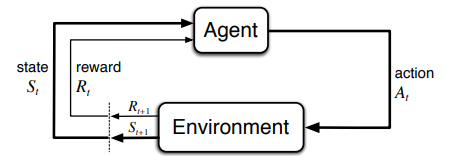
    <figcaption>Note: Schematic agent-environment interaction, from Sutton and Barto, 2018</figcaption>
</figure>

Compared to **Dynamic Programming**, both approaches built on the same underlying concepts, such as *Bellman Equations* and *Markov-Decision-Processes*. However, the approach is different. RL is data-driven through interation. DP focuses on computation, and needs a model.

| **Aspect**            | **Reinforcement Learning (RL)**               | **Dynamic Programming (DP)**            |
|------------------------|-----------------------------------------------|-----------------------------------------|
| **Model**             | Unknown or partially known                   | Fully known                             |
| **Learning Approach** | Trial-and-error, data-driven                 | Computation-based                       |
| **Exploration**       | Actively explores environment                | No exploration needed                   |
| **Applications**      | Complex, messy problems; potentially changing rules of the environment, multiple equilibria | Small, well-defined problems            |
| **Scalability**       | Scalable with approximation techniques       | Limited by "curse of dimensionality"    |

----------------

### Motivating examples

- [Boston Dynamics](https://www.bostondynamics.com/): Using reinforcement learning to teach **robots** how to move and interact with their environment.

- [Self-Driving Cars](https://waymo.com/): Using reinforcement learning algorithms for **autonomous driving**.

- [Deepmind AlphaGo](https://deepmind.google/research/breakthroughs/alphago/): RL winning against a human in **complex games like Go** where the state space is *too big* to fully compute, let alone iterate over ([around $10^700$ possible play trajectories](https://en.wikipedia.org/wiki/Go_and_mathematics)).

- [OpenAI Multi-Agent Hide and Seek](https://openai.com/index/emergent-tool-use/): **Collaboration and competition** between agents using reinforcement learning.

----------------

### The Q-Learning algorithm

Q-Learning is a popular algorithm to use in simple applications and for research. It is a relatively tractible algorithm, which is learns more efficient compared to similar algorithms. 

Q-learning addresses Markov decision processes (MDPs) where the state space $S$ and action space $A$ are finite. In each period, an agent observes the current state $s_t \in S$, selects an action $a_t \in A$, receives a reward $r_t$, and transitions to the next state $s_{t+1}$ according to a (stationary) probability distribution $F(r_t, s_{t+1}|s_t, a_t)$.

The agent’s objective is to maximize the expected discounted sum of rewards:

$
E\left[\sum_{t=0}^\infty \beta^t r_t \right],
$

where $\beta < 1$ is the discount factor. In DP, we solve this problem according to the Bellman equation of the value function:

$
V(s) = \max_{a \in A} \left\{ \mathbb{E}[r | s, a] + \delta \mathbb{E}[V(s')] | s, a \right\}
$

Instead, Q-learning focuses on estimating the Q-function (formulated recursively). Which provides an estimated function of the value of the instantaneous and future rewards (conditional on the policy that is followed), for all state-action pairs:

$
Q(s, a) = E[r|s, a] + \beta E\left[\max_{a' \in A} Q(s', a')|s, a\right],
$

which represents the discounted payoff of taking action $a$ in state $s$ and *following the optimal policy thereafter*. The value function $V(s)$ relates in this case to the Q-function as; 

$V(s) = \max_{a \in A} Q(s, a)$.

**Key Features of Q-Learning**

Q-learning estimates the Q-matrix $Q$ iteratively without requiring knowledge of the underlying distribution $F(r, s'|s, a)$. Starting with an arbitrary initialization of the Q-Matrix $Q_0$. The algorithm updates the Q-matrix after observing the reward $r$ and the next state $s'$ using the update rule:

$
Q_{t+1}(s, a) = (1 - \alpha) Q_t(s, a) + \alpha \left[r + \delta \max_{a' \in A} Q_t(s', a')\right],
$

where $\alpha$ is the learning rate. The update can instead be written using the temporal difference (TD) error:

$
\text{TD-error} = r + \beta \max_{a' \in A} Q_t(s', a') - Q_t(s, a)
$

This means at the beginning of period t+1, we update the Q-Matrix entry related to the decisions at time t using: 

$
Q_{t+1}(s, a) \gets Q_t(s, a) + \alpha \left[r + \beta \max_{a'} Q_t(s', a') - Q_t(s, a) \right]
$

**Action Selection: $\epsilon$-Greedy Policy**

To balance exploration and exploitation, Q-learning often employs an $\epsilon$-greedy policy. With probability $\epsilon$, the agent explores by selecting a random action; otherwise, it exploits by choosing the action $a$ that maximizes $Q(s, a)$.

**Off-Policy Nature**

Q-learning is off-policy, meaning the update rule evaluates the optimal policy $\max_{a' \in A} Q(s', a')$ regardless of the actions taken. This allows the agent to improve its estimate of the Q-matrix while potentially following a different behavior policy during learning.

**Pseudo Code**

<figure>
    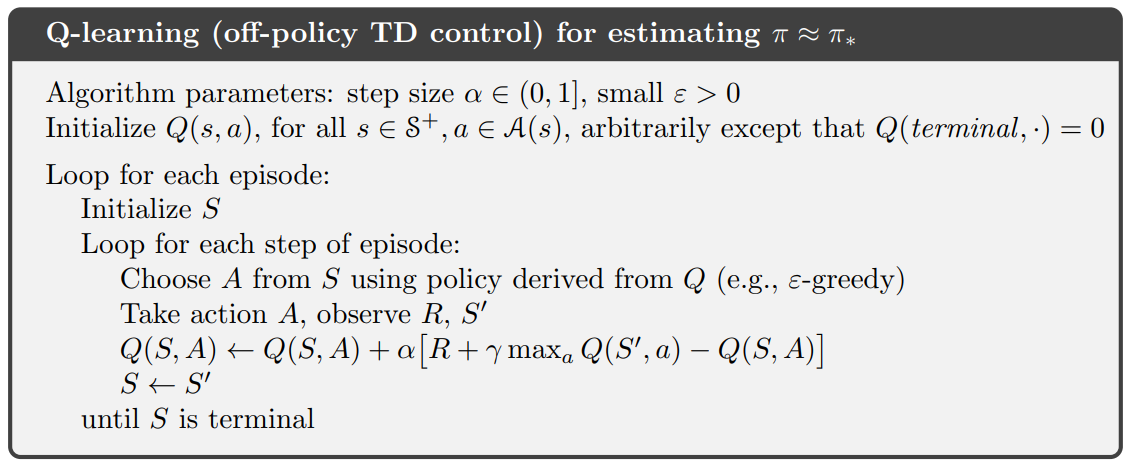
    <figcaption>See: Sutton and Barto, 2018, chapter 6, page 131</figcaption>
</figure>

----------------

### Want to learn more about RL? 

The best resources are available online free of charge! (Gotta love the open-source community!)

- The main introductory textbook is "Reinforcement Learning: An Introduction (2nd edition)" by Richard Sutton and Andrew Barto. 
- Deepmind has a series of classes on [YouTube](https://www.youtube.com/@Google_DeepMind/courses) which are great, especially for the link to Deep Reinforcement Learning (DRL).
  
----------------

## How has it been used in economics?

Reinforcement learning is currently a very active field of research. However, applications to economics remain thusfar limited. This is partly because of the focus of the methods on *learning and adaptation*. Moreover, the algorithms that are best understood are all based on a tabular function respresentation. These are not computationally efficient and do not generalize well. Practical applications of reinforcement learning typically use neural networks as function approximators (deep reinforcement learning). These algorithms are however still largely black boxes.

Some initial work that has been conducted using RL in economics:

- [Calvano et all, 2020](https://www.aeaweb.org/articles?id=10.1257/aer.20190623): Bertrand pricing game with product differentiation where the sellers are q-learning agents. They learn to collude tacitely (including deviation-punishment strategies) and set near-monopoly prices.
- [IMF WP; Atashbar and Shi, 2022](https://www.imf.org/en/Publications/WP/Issues/2022/12/16/Deep-Reinforcement-Learning-Emerging-Trends-in-Macroeconomics-and-Future-Prospects-527008): Deep Reinforcement Learning: Emerging Trends in Macroeconomics and Future Prospects
- [IMF WP; Atashbar and Shi, 2023](https://www.imf.org/en/Publications/WP/Issues/2023/02/24/AI-and-Macroeconomic-Modeling-Deep-Reinforcement-Learning-in-an-RBC-model-530084): AI and Macroeconomic Modeling: Deep Reinforcement Learning in an RBC model
- [QuantEcon](https://python.quantecon.org/mccall_q.html): Job Search VII: A McCall Worker Q-Learns

And similarly there has been work on economics/social sciences applications of RL from researchers outside of the economics discipline. Specifically, the work on "social sequential dilemmas" (= Games) and emergent simulated economies. For example:

- [Leibo et al, 2017](https://arxiv.org/abs/1702.03037): Multi-agent Reinforcement Learning in Sequential Social Dilemmas
- [Johansen et al, 2022](https://arxiv.org/abs/2205.06760): Emergent Bartering Behaviour in Multi-Agent Reinforcement Learning

----------------

### When would you use it?

The usefulness of the approach depends on the type of problem. As you will see in the next example, not all problems that can be solved using RL need RL. So when is it useful? 

- When the environment is non-stationary:
  - *Learning means adjusting and updating based on the latest information*    
- When we want to model multiple decision makers as boundedly rational agents (multi-agent reinforcement learning)
  - *Emergent behaviours such as cooperation/competition*
- When the state space is too large to do a full sweep
  - *And you want to learn only the subsets that generate high-rewards*
- Model-free learning: You want the agent to learn only from experience without a functional form
    - *Emergent economies*  

When is it not useful?

- When you cannot formulate the problem recursively (Bellman Equation)
- When regular approaches to solve the DP problem are relatively fast
    - *You have a model, and the state space is not too large*
 
----------------

## Example 1: Simple Neoclassical growth model

----------------

**From PS2 Macro3.A 2024**

Imagine, you are the social planner. But you are not **just** a social planner. You are a **new** social planner, freshly installed by the almighty creature that governs the universe. This almighty creature fired the previous social planner, because she/he was skimming off some resources in the economy and keeping it for her/his self. 

Your task: Implement the allocation of resources that maximises social welfare. To reach this goal you observe the previous level of capital in the economy $k$ (state), and you can set the new level of capital $k'$ (action). 

**But...** unfortunately your almightly employer is not all-knowing: He cannot tell you the DGP of the economy. That means you will have to try to figure out the optimal allocation of resources through trial-and-error, as you cannot sweep over the state space. Thank god you brought your Q-Learning algorithm with you! 

----------------

### The DGP:

In this example, the growth model is deterministic and labor is supplied inelastically. The social planner’s recursive problem is written as:

$
V(k) = \max_{k' \in \Gamma(k)} \{ u(f(k) + (1 - \delta)k - k') + \beta V(k') \}
$

where $\Gamma(k) = [0, k^\alpha + (1 - \delta)k]$ defines the feasible set for the choice variables.

**Implementation:**
- *Production Function:* $f(k) = k^\alpha$ with $\alpha = 0.36$
- *Utility Function:* $u(c) = \log(c)$
- *Discount Factor:* $\beta = 0.9$
- *Depreciation Rate:* $\delta = 0.025$

*Although you do not know the DGP of the economy, one of your predecessors did.* Unfortunately, she/he forgot to push the model to Git and now the information is lost forever. She/he does leave you her/his values for the possible actions that can be taken (the capital grid). Specifically, your predecessor analytically derived the steady-state value of capital and used that to center the numerical grid. 


<span style="color: gray;">
You do not know it, but he did the following: The Bellman equation with functional forms is:

$
V(k) = \max_{k' \in \Gamma(k)} \{ \log(k^\alpha + (1 - \delta)k - k') + \beta V(k') \}
$

Taking the derivative of the objective function with respect to $k'$, we derive the inter-temporal Euler equation:

$
\frac{1}{k^\alpha + (1 - \delta)k - k'} = \beta \left[ \alpha (k')^{\alpha - 1} + (1 - \delta) \right]
$

At the steady state, $k = k' = k''$, simplifying the Euler equation to:

$
k_{ss} = \left[ \frac{1 - \beta(1 - \delta)}{\beta \alpha} \right]^{\frac{1}{1 - \alpha}}
$

Substitute the given parameters ($\alpha = 0.36$, $\beta = 0.9$, $\delta = 0.025$) into the steady-state formula to calculate $k_{ss}$.
</span>

----------------


### Compare Q-Learning to VFI benchmark:

In this part we cheat a little bit, and assume we know a reasonable grid of capital to choose from: The grid around the steady state. 

First, we load in the objects: 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os, time, timeit, random

class SP_Problem:
    '''
    Add documentation
    '''

    def __init__(self, a, b, d, nkk):

        np.random.seed(42)

        self.a = a
        self.b = b
        self.d = d
        self.nkk = nkk

        kss = (self.b * self.a / (1 - self.b * (1 - self.d))) ** (1 / (1 - self.a))
        self.grid = np.linspace(start=0.9 * kss, stop=1.1 * kss, num=self.nkk)

    def VFI(self, tol):

        v_prev = np.zeros(self.nkk)
        v_new = np.zeros(self.nkk)
        pol = np.zeros(self.nkk)

        start = time.time()

        it = 0
        e = 1

        while e > tol:

            for x in range(0, len(self.grid)):  # for each k, compute value and policy function

                k = self.grid[x]

                v_iter = np.log(k ** self.a + (1 - self.d) * k - self.grid) + self.b * v_prev
                v_iter[self.grid > k ** self.a + (1 - self.d) * k] = -np.inf

                v_new[x] = np.max(v_iter)
                pol[x] = self.grid[np.where(v_iter == np.max(v_iter))]

            e = max(np.abs(v_new) - np.abs(v_prev))

            v_prev = v_new.copy()

            it += 1
            if it > 50000: break

        end = time.time()
        print(f"Elapsed time: {end - start} seconds")

        setattr(self, "vfi_policy", pol)
        setattr(self, "vfi_valuefunc", v_new)

    def _policy(self, s_idx, p, qmatrix):
        # Based on the 'draw of nature' follow the policy (1: exploit, 0: explore)
        if np.random.rand() > p:

            a = np.max(qmatrix[s_idx, :])
            a_idx = np.where(qmatrix[s_idx, :] == a)[0]

            if len(a_idx) > 1:
                a_idx = np.random.choice(a_idx)
            else:
                a_idx = a_idx[0]
        else:
            a_idx = np.random.choice(self.nkk)

        return a_idx

    def qlearning(self, learningrate, e, maxiters, e_update_prop, tol, ma_window_td_convergence=None):
        # Default value none
        # Parameters ------
        self.learningrate = learningrate
        self.e = e # exploration rate
        self.iters = maxiters

        self.t = 0

        if e_update_prop == 0: # Set to zero if you want no updating of the exploration rate
            self.e_update = 0
        else:
            self.e_update = self.e / (self.iters * e_update_prop)

        instant_utility = [np.log(k ** self.a + (1 - self.d) * k - self.grid) for k in self.grid]
        self.instant_utility = np.nan_to_num(instant_utility, nan=-np.inf)

        # Objects to store ----
        self.qmatrix = np.zeros((self.nkk, self.nkk))
        k_policy = np.zeros(self.iters)
        tderrors = np.zeros(self.iters)

        # Step 0: Random first state
        k_idx = np.random.choice(self.nkk)

        start = time.time()

        while self.t < self.iters:
            # Step 1: Given state (k), agent chooses k' according to policy
            kn_idx = self._policy(k_idx, self.e, self.qmatrix)

            # Step 2: Calculate TD error of Q-learning
            td_error = self.instant_utility[k_idx, kn_idx] + self.b * np.max(self.qmatrix[kn_idx, :]) - self.qmatrix[k_idx, kn_idx]

            # Step 3: Update estimated Q-value
            self.qmatrix[k_idx, kn_idx] += learningrate * td_error

            # Step 4: Overwrite values for the next period:
            self.e -= self.e_update
            if self.e < 0:
                self.e = 0

            k_idx = kn_idx

            k_policy[self.t] = kn_idx
            tderrors[self.t] = td_error

            if ma_window_td_convergence is not None and self.t > ma_window_td_convergence:
                err = np.sum(np.abs(tderrors[(self.t - ma_window_td_convergence):self.t]))
                if err < tol:
                    break

            self.t += 1

        end = time.time()
        print(f"Elapsed time: {end - start} seconds, amount of iterations: {self.t}")

        setattr(self, "ql_policy_hist", k_policy[:self.t])
        setattr(self, "tderrors_hist", tderrors[:self.t])

        setattr(self, "ql_valuefunc", np.max(self.qmatrix, axis=1))
        setattr(self, "ql_policy", self.grid[np.argmax(self.qmatrix, axis=1)])

    def stabilize_qlearning(self, extra_iters, start_idx=None, inplace_qmat_update=True, policy_name="stable_ql_policy"):

        # Add a couple of additional runs to let the policy stabilize:
        if start_idx is None:
            start_idx = np.random.choice(self.nkk)

        k_policy_conv = np.zeros(extra_iters)

        for t in range(0, extra_iters):
            kn_idx = self._policy(start_idx, 0, self.qmatrix)

            if inplace_qmat_update:
                td_error = self.instant_utility[start_idx, kn_idx] + self.b * np.max(self.qmatrix[kn_idx, :]) - self.qmatrix[
                    start_idx, kn_idx]

                self.qmatrix[start_idx, kn_idx] += self.learningrate * td_error

            start_idx = kn_idx

            k_policy_conv[t] = kn_idx

            setattr(self, policy_name, k_policy_conv)
    def rapport_plots(self, plot_value_function=False, plot_policy_function=False,
                      plot_convergence=False, plot_unstable_policy=False, plot_greedy_policy=False,
                      plot_comparison_policy=False):

        # Plot Value + policy func ----------------
        if plot_value_function:
            # Value function
            plt.figure()
            plt.plot(self.grid, self.ql_valuefunc, color="red", label="Q-Learning")
            plt.plot(self.grid, self.vfi_valuefunc, color="blue", label="VFI")
            plt.legend()
            plt.title("Value Function Comparison")
            plt.show()

        if plot_policy_function:
            # Policy function
            plt.figure()
            plt.plot(self.grid, self.ql_policy, color="red", label="Q-Learning")
            plt.plot(self.grid, self.vfi_policy, color="blue", label="VFI")
            plt.plot(self.grid, self.grid, linestyle="dotted", label="45 degree line")
            plt.xlabel("k")  # Label for x-axis
            plt.ylabel("k'")
            plt.legend()
            plt.title("Policy Function Comparison")
            plt.show()

        # Convergence -----------------------------
        if plot_convergence:
            mavals = np.convolve(self.tderrors_hist, np.ones(1000) / 1000, mode='valid')

            plt.figure()
            plt.scatter(range(len(self.tderrors_hist)), self.tderrors_hist, alpha=0.3, label='TD Errors')
            plt.plot(range(len(mavals)), mavals, color='red', linewidth=2, label='Moving Average (window=1000)')
            plt.xlabel('Time Step')
            plt.ylabel('TD Error')
            plt.legend()
            plt.title("Convergence of TD Errors")
            plt.show()

        # Plot unstable policy ---------------------
        if plot_unstable_policy:
            plt.figure()
            plt.plot(self.ql_policy_hist[-100:], label="Last 100 observations policy function")
            plt.xlabel('Time Step')
            plt.ylabel("k'")
            plt.legend()
            plt.title("Unstable Policy Function")
            plt.show()

            print(f"Policy still explores with a share of {self.e}.")

        # Plot convergence of greedy policy function --------
        if plot_greedy_policy:
            self.stabilize_qlearning(30, start_idx=0, policy_name="k_policy_conv_lb")
            self.stabilize_qlearning(30, start_idx=self.nkk - 1, policy_name="k_policy_conv_ub")

            plt.figure()
            plt.plot(range(len(self.k_policy_conv_lb)), self.grid[self.k_policy_conv_lb.astype(int)],
                     label="Convergence starting from lower bound", color="red")
            plt.plot(range(len(self.k_policy_conv_ub)), self.grid[self.k_policy_conv_ub.astype(int)],
                     label="Convergence starting from upper bound", color="blue")
            plt.xlabel("Iteration")  # Label for x-axis
            plt.ylabel("Greedy g(k) = k'")
            plt.legend()
            plt.title("Greedy Policy Convergence")
            plt.show()

        # Plot comparison policy funcs --------
        if plot_comparison_policy:
            lb = int(self.k_policy_conv_lb[-1])
            ub = int(self.k_policy_conv_ub[-1])

            plt.figure()
            plt.plot(self.grid[lb - 5:ub + 5], self.vfi_policy[lb - 5:ub + 5], label="VFI policy function")
            plt.plot(self.grid[lb - 5:ub + 5], self.grid[lb - 5:ub + 5], linestyle="dotted", color="black")
            plt.axhline(y=self.grid[lb], color='red', linestyle='--', label="Greedy Q-Learning policy: LB")
            plt.axhline(y=self.grid[ub], color='blue', linestyle='--', label="Greedy Q-Learning policy: UB")
            plt.xlabel("k")  # Label for x-axis
            plt.ylabel("k'")
            plt.legend()
            plt.title("Policy Comparison with VFI and Q-Learning around fixed point")
            plt.show()

In case the structure is a little abstract to you, let's first visualize the main components of the object we create: 

In [27]:
# Initialize test object ---------------------
sptest = SP_Problem(
    a = 0.36,
    b = 0.9,
    d = 0.025,
    nkk = 5
)
sptest.qlearning(learningrate=0.9,e=0.8,maxiters=10,e_update_prop=0.8, tol=0.00001)

# Subsetting elements
print(f"SP_Problem is a class: a blue print for the objects. The object here is sptest. \n This means you can reach attributes and methods using sptest.ATTRIBUTE or sptest.METHOD. \n For example to get the grid; sptest.grid: {sptest.grid}")

Elapsed time: 0.0 seconds, amount of iterations: 10
SP_Problem is a class: a blue print for the objects. The object here is sptest. 
 This means you can reach attributes and methods using sptest.ATTRIBUTE or sptest.METHOD. 
 For example to get the grid; sptest.grid: [4.11392575 4.34247718 4.57102861 4.79958004 5.02813147]


In [28]:
# Subsetting methods and private indicators
print(f"Private elements starts with _ and are not supposed to be used apart from construction. They can still be accessed in python. \n For example let's get one new state index according to our policy: ")
sptest._policy(s_idx=3, p=0.2, qmatrix=sptest.qmatrix)

Private elements starts with _ and are not supposed to be used apart from construction. They can still be accessed in python. 
 For example let's get one new state index according to our policy: 


3

In [29]:
# Showing all items in the dictionary
print("We can retrieve all items of the Class to see what is in there")
print(dir(sptest))

We can retrieve all items of the Class to see what is in there
['VFI', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_policy', 'a', 'b', 'd', 'e', 'e_update', 'grid', 'instant_utility', 'iters', 'learningrate', 'nkk', 'ql_policy', 'ql_policy_hist', 'ql_valuefunc', 'qlearning', 'qmatrix', 'rapport_plots', 'stabilize_qlearning', 't', 'tderrors_hist']


In [30]:
# Now for the Q-learning elements

# Q-Matrix: 
print(f"The Q-Matrix contains an index for each state-action (k, k') pair: \n {sptest.qmatrix} \n")

The Q-Matrix contains an index for each state-action (k, k') pair: 
 [[0.         0.         0.         0.         0.        ]
 [0.         0.79506196 0.         0.         0.        ]
 [0.         0.55002056 1.58435194 0.         0.13114259]
 [0.         0.         0.56210665 0.         0.        ]
 [0.         0.         0.78248784 0.         0.        ]] 



In [31]:
# Learning: 
print(f"The learning rate is a fixed parameter {sptest.learningrate}, you could opt for a different scheme such as a linearly decreasing value")

The learning rate is a fixed parameter 0.9, you could opt for a different scheme such as a linearly decreasing value


In [32]:
# Exploration: 
print(f"The exploration rate declines linearly over time starting, with the last (1 - e_update_prop)*maxiters for convergence. \n Each period the exploration rate declines by {sptest.e_update}")

The exploration rate declines linearly over time starting, with the last (1 - e_update_prop)*maxiters for convergence. 
 Each period the exploration rate declines by 0.1


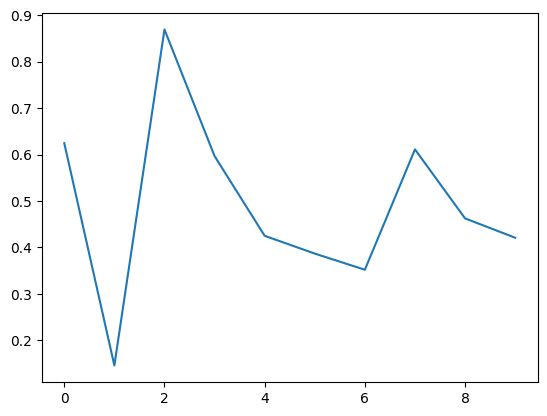

In [33]:
# And we have a history of td-errors: 
plt.figure()
plt.plot(sptest.tderrors_hist)
plt.show()

Then we plot a range of comparisons between VFI and Q-Learning to show the differences and similarities in the outcomes:

In [2]:
# Initialize object ---------------------
sp = SP_Problem(
    a = 0.36,
    b = 0.9,
    d = 0.025,
    nkk = 100
)

# VFI benchmark --------------------------
sp.VFI(tol=0.00001)

# Q-Learning version ---------------------
sp.qlearning(
    learningrate=0.9,
    e=0.8,
    maxiters=1000000,
    e_update_prop=0.8,
    tol=0.00001,
    ma_window_td_convergence=1000
)

C:\Users\linas\AppData\Local\Temp\ipykernel_9988\3034195316.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pol[x] = self.grid[np.where(v_iter == np.max(v_iter))]


Elapsed time: 0.34668421745300293 seconds
Elapsed time: 14.272347927093506 seconds, amount of iterations: 276170


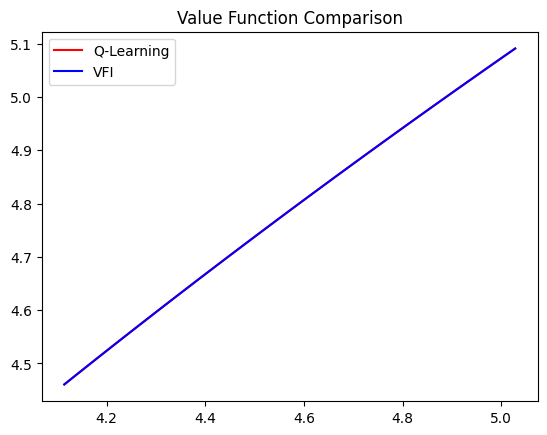

In [3]:
# Plot the value functions: Similar
sp.rapport_plots(plot_value_function=True)

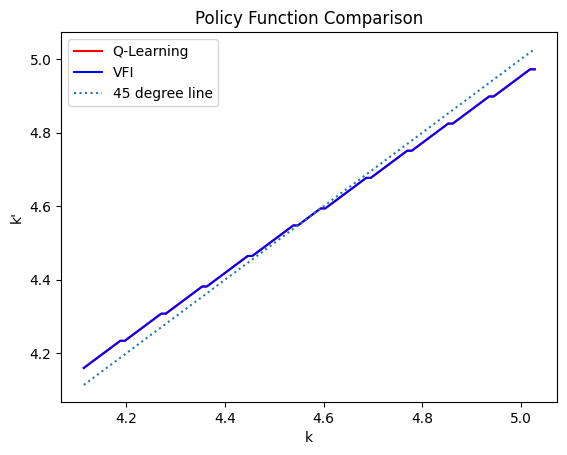

In [4]:
# Plot the policy functions
sp.rapport_plots(plot_policy_function=True)

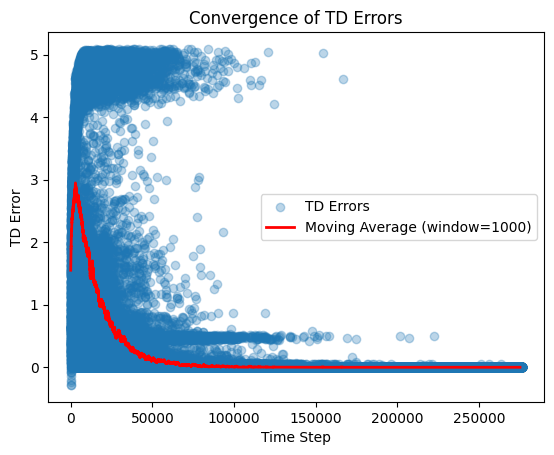

In [5]:
# Plot the TD-error over time to check the convergence
sp.rapport_plots(plot_convergence=True)

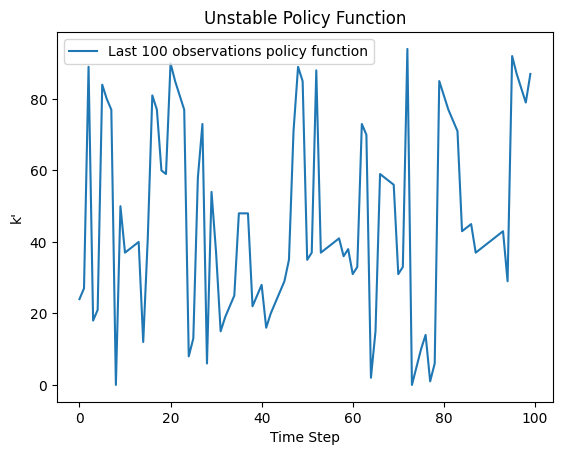

Policy still explores with a share of 0.5238289999920586.


In [6]:
# So does convergence according to our criterion mean we found the fixed point? Hence k' chosen is always the same? 
# Spoiler alert: Nope
sp.rapport_plots(plot_unstable_policy=True)

# It can be unstable for two reasons: 
#1). Exploration is not over yet, 
#2). There is a flat part on the optimal policy function related to the grid/tabular implementation

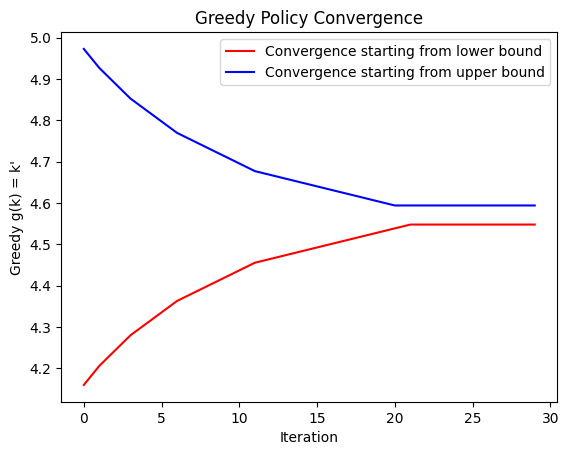

In [7]:
# So what about the greedy policy, does it converge if we don't explore? 
# Spoiler alert: Yes
sp.rapport_plots(plot_greedy_policy=True)

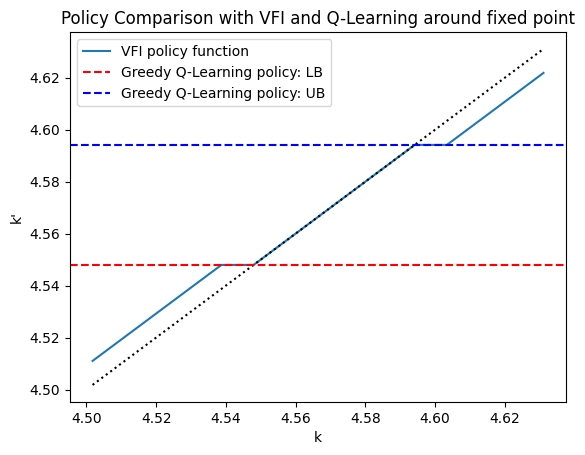

In [8]:
# Is this the same as the estimated flat part of the VFI policy function?
# Yes, in case of small state spaces, otherwise not estimated precisely enough according to our specification. 
sp.rapport_plots(plot_comparison_policy=True)

### Increase the state-space:

So what happens when we increase the state-space? We need substantially more iterations, and we will still have decisions based on the Q-Matrix that are slightly less precise. The policy function looks more erratic... But that does not need to mean that the optimal policy is not learnt. It represents less precision for states less visited. The convergence of the greedy policy shows the social planner would get back quickly to the optimal policy when receiving a random state $k$. 

C:\Users\linas\AppData\Local\Temp\ipykernel_9988\3034195316.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pol[x] = self.grid[np.where(v_iter == np.max(v_iter))]


Elapsed time: 3.037097692489624 seconds
Elapsed time: 45.110790491104126 seconds, amount of iterations: 783236


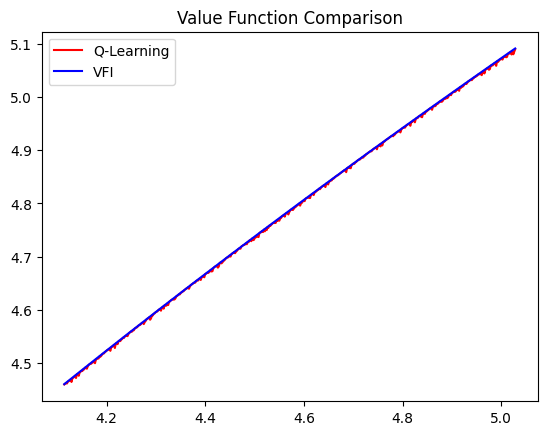

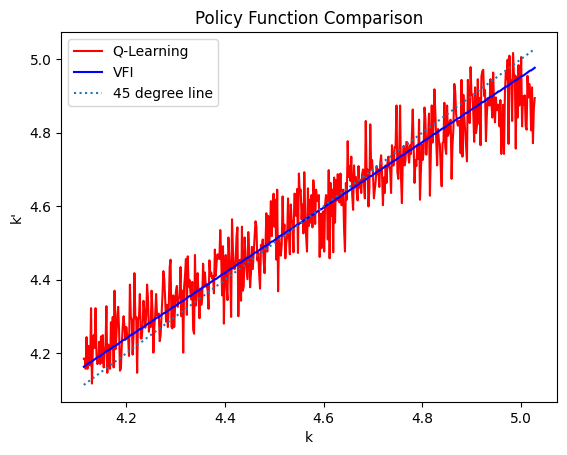

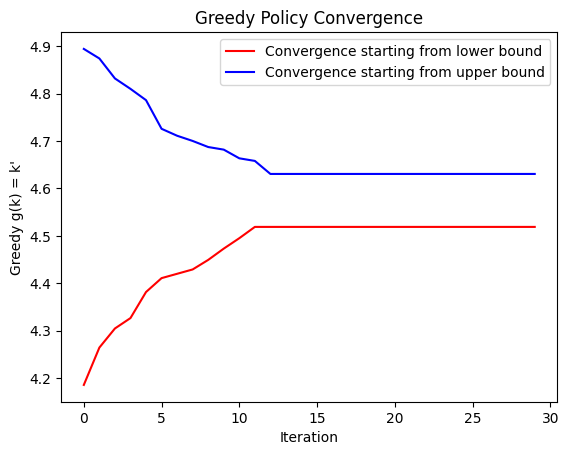

In [9]:
# Initialize object ---------------------
sp500 = SP_Problem(
    a = 0.36,
    b = 0.9,
    d = 0.025,
    nkk = 500
)

# VFI benchmark --------------------------
sp500.VFI(tol=0.00001)

# Q-Learning version ---------------------
sp500.qlearning(
    learningrate=0.9,
    e=0.8,
    maxiters=1000000,
    e_update_prop=0.8,
    tol=0.00001,
    ma_window_td_convergence=1000
)

# Value functions:
sp500.rapport_plots(plot_value_function=True)

# Policy functions: 
sp500.rapport_plots(plot_policy_function=True)

# Greedy policy after convergence: 
sp500.rapport_plots(plot_greedy_policy=True)

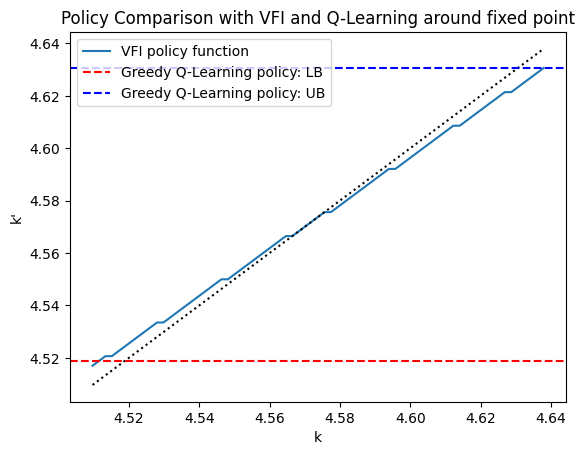

In [18]:
sp500.rapport_plots(plot_comparison_policy=True)

### Some practical trade-offs in the implementation:

Normally, a substantial amount of time would be spent on "hyperparameter tuning". The art of finding the combinations of parameters that result in quick convergence and precise estimates. In our simple example with tabular Q-Learning, two important parameters are to set are the learning rate $\alpha$ and the exploration rate $\epsilon$. 

Best-practice would be to do a grid search over the combinations of the two parameters. Instead, we briefly look into the convergence for different values, fixing the other parameter. 

First for $\alpha$:

In [10]:
for a_test in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(f"Learning rate: {a_test}")
    sp_a = SP_Problem(a = 0.36, b = 0.9, d = 0.025, nkk = 25)
    sp_a.qlearning(learningrate=a_test,e=0.8,maxiters=1000000,e_update_prop=0.8,tol=0.00001,ma_window_td_convergence=1000)
    del sp_a

Learning rate: 0.1
Elapsed time: 18.456390142440796 seconds, amount of iterations: 289587
Learning rate: 0.2
Elapsed time: 7.988273620605469 seconds, amount of iterations: 127924
Learning rate: 0.3
Elapsed time: 4.9253387451171875 seconds, amount of iterations: 77176
Learning rate: 0.4
Elapsed time: 3.905332088470459 seconds, amount of iterations: 60524
Learning rate: 0.5
Elapsed time: 1.6956787109375 seconds, amount of iterations: 49734
Learning rate: 0.6
Elapsed time: 0.9024853706359863 seconds, amount of iterations: 39299
Learning rate: 0.7
Elapsed time: 0.680046558380127 seconds, amount of iterations: 29722
Learning rate: 0.8
Elapsed time: 0.5997765064239502 seconds, amount of iterations: 24984
Learning rate: 0.9
Elapsed time: 0.4920046329498291 seconds, amount of iterations: 22456


As you can see, parameters matter a lot. 

Now for the exploration rate $\epsilon$:

In [11]:
for e_test in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(f"Exploration rate: {e_test}")
    sp_e = SP_Problem(a = 0.36, b = 0.9, d = 0.025, nkk = 25)
    sp_e.qlearning(learningrate=0.9,e=e_test,maxiters=1000000,e_update_prop=0.8,tol=0.00001,ma_window_td_convergence=1000)
    del sp_e

Exploration rate: 0.1
Elapsed time: 5.038386821746826 seconds, amount of iterations: 202376
Exploration rate: 0.2
Elapsed time: 2.8041584491729736 seconds, amount of iterations: 143498
Exploration rate: 0.3
Elapsed time: 1.3477427959442139 seconds, amount of iterations: 65923
Exploration rate: 0.4
Elapsed time: 1.021517276763916 seconds, amount of iterations: 48843
Exploration rate: 0.5
Elapsed time: 0.6188225746154785 seconds, amount of iterations: 29492
Exploration rate: 0.6
Elapsed time: 0.5277502536773682 seconds, amount of iterations: 24157
Exploration rate: 0.7
Elapsed time: 0.45971250534057617 seconds, amount of iterations: 21351
Exploration rate: 0.8
Elapsed time: 0.524482250213623 seconds, amount of iterations: 22456
Exploration rate: 0.9
Elapsed time: 0.6203343868255615 seconds, amount of iterations: 27070


## Example 2: Neoclassical Growth Model with uncertainty and labor/leisure choice

----------------

**PS3 Macro3.A 2024**

After performing very well in your previous economy, your almightly employer decides to promote you. Unfortunately, this economy is a little more complicated: Labour is now no longer supplied inelastically, and more **importantly, the economy can be in different states of productivity**. **But...** given that your employer does not know the DGP, he can also not tell you the transition matrices. As a result **you will not only have to learn the optimal action, but also the expectation of values over future states.**

----------------

### The DGP

You need to solve the Neoclassical Growth Model with uncertainty and labor/leisure choice through trial-and-error. The problem can be written as:

$V(k, z) = \max_{k', l} \Big\{ u(c, l) + \mathbb{E}_{z'|z}[V(k', z')]\Big\}$

subject to:

$c + k' = f(k, l) + (1 - \delta)k$

$z' = \rho z + \epsilon, \quad \epsilon \sim N(0, \sigma_\epsilon^2)$

$k' \in \Gamma(k, z), \quad l \in [0, 1]$

We assume the production function is:

$f(z, k, l) = e^z k^\alpha l^{1-\alpha}$

with parameters:

$\alpha = 0.36, \quad \beta = 0.96, \quad \delta = 0.025, \quad \rho = 0.95, \quad \sigma_\epsilon = 0.007$

and the utility function is:

$u(c, l) = (1 - \theta) \log(c) + \theta \log(1 - l)$,

where:

$\theta = 0.64$

Both households and firms optimize and there is no heterogeneity, meaning for both we have a representative agent. Labour supply is endogenous and set by the households when they solve their intratemporal optimization problem: 

$\max_{l, c} u(c, l) = \max_{l} (1-\theta) \log (e^z k^\alpha l^{1 - \alpha} + (1 - \delta)k - k') + \theta \log(1 - l) $

And choose the level of labour that solves the first order condition (using the bisection algorithm, these households are smart!): 

$\frac{\partial u}{\partial l} = \frac{(1-\theta)(1 - \alpha) e^z k^\alpha l^{- \alpha}}{e^z k^\alpha l^{1 - \alpha} + (1 - \delta)k - k'} - \frac{\theta}{1 - l} = 0$

The DGP of the economy includes this optimal labour decision in the rewards $r$ that result from the utility function. This means as a social planner you do not need to decide on $l$. Instead the reward $r$ associated with the state variables $z$, $k$, and the action $k'$ incorporates the information of this labour decision, as well as all information of the firm-problem and the utility of the households. 

----------------

### Compare Q-Learning to VFI benchmark:

Again, to make the problem a little easier (smaller) we use the capital grid centered around the steady state values, which is kindly left to you by your predecessor, who also forgot to push the model of the DGP to Git... 

First we load the objects again:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import bisect
import time

class SP_Problem2:
    def __init__(self, a, b, d, nkk, nzz, t, r, s):
        self.a = a
        self.b = b
        self.d = d
        self.nkk = nkk
        self.nzz = nzz
        self.t = t
        self.r = r
        self.s = s

        # Steady-state capital and grid
        self.l_ss = ((1 - self.a) * (1 - self.t)) / ((1 - self.a) * (1 - self.t) + self.t - (self.d * self.t * self.a * self.b / (1 - self.b * (1 - self.d))))
        self.k_ss = ((self.b * self.a / (1 - self.b * (1 - self.d))) ** (1 / (1 - self.a))) * self.l_ss
        self.k_grid = np.linspace(0.5 * self.k_ss, 1.5 * self.k_ss, self.nkk)

        # Shock grid
        x_start = -2 * np.sqrt((self.s ** 2 / (1 - self.r ** 2)))
        x_end = 2 * np.sqrt((self.s ** 2 / (1 - self.r ** 2)))
        self.z_grid = np.linspace(x_start, x_end, self.nzz)

        self.z_indices = [i for i in range(0,self.nzz)]

        # Transition probabilities
        self.z = []
        delta_x = (self.z_grid[1] - self.z_grid[0]) / 2
        for i in self.z_grid:
            temp = [norm.cdf((j - self.r * i + delta_x) / self.s) - norm.cdf((j - self.r * i - delta_x) / self.s) for j in self.z_grid[1:(len(self.z_grid) - 1)]]
            self.z.append(np.array([norm.cdf((self.z_grid[0] - self.r * i + delta_x) / self.s)] + temp + [1 - norm.cdf((self.z_grid[-1] - self.r * i - delta_x) / self.s)]))

        self._initialize_economy()

    def _intra_temp_labour(self, k, next_k, z):
        """
        Solve for optimal labor supply using intra-temporal first-order conditions.
        """
        alpha, theta, delta = self.a, self.t, self.d

        if (next_k - (1 - delta) * k) < 0:
            l_min = 0
        else:
            l_min = ((next_k - (1 - delta) * k) / np.exp(z) * k ** alpha) ** (1 / (1 - alpha))

        def lhs(l):
            try:
                lh = ((1 - theta) * (1 - alpha) * np.exp(z) * k ** alpha * l ** (-alpha)) / (np.exp(z) * k ** alpha * l ** (1 - alpha) + (1 - delta) * k - next_k)
            except ZeroDivisionError:
                lh = np.inf
            return lh

        def rhs(l):
            try:
                rh = (1 / (1 - l)) * theta
            except ZeroDivisionError:
                rh = np.inf
            return rh

        def f(l):
            return lhs(l) - rhs(l)

        if l_min > 1:
            l_s = 1
        else:
            if lhs(l_min) < rhs(l_min):
                l_s = l_min
            elif lhs(1) > rhs(1):
                l_s = 1
            else:
                l_s = bisect(f, a=l_min, b=1)

        return l_s

    def _utility(self, k, next_k, z, opt_l):
        """
        Calculate utility based on the optimal labor decision.
        """
        alpha, theta, delta = self.a, self.t, self.d
        output = np.exp(z) * k ** alpha * opt_l ** (1 - alpha)
        c = output + (1 - delta) * k - next_k

        if c < 0:
            return -np.inf
        else:
            return (1 - theta) * np.log(c) + theta * np.log((1 - opt_l))

    def _initialize_economy(self):
        start = time.time()

        self.l_star = [[[self._intra_temp_labour(k=self.k_grid[k_s], next_k=self.k_grid[k_n], z=self.z_grid[z_s])
                    for z_s in range(0, self.nzz)]
                   for k_n in range(0, self.nkk)]
                  for k_s in range(0, self.nkk)]  # l_star[k][k'][z]

        self.u_star = [[[self._utility(k=self.k_grid[k_s], next_k=self.k_grid[k_n], z=self.z_grid[z_s], opt_l=self.l_star[k_s][k_n][z_s])
                    for k_n in range(0, self.nkk)]
                   for z_s in range(0, self.nzz)]
                  for k_s in range(0, self.nkk)]  # u_star[k][k'][z]

        self.u_star_ql = [
            [
                [
                    -100000 if np.isinf(value) or np.isnan(value) else value
                    for value in row
                ]
                for row in plane
            ]
            for plane in self.u_star
        ]

        end = time.time()
        print("Elapsed time", end - start)

    def _policy(self, zidx, kidx, p, qmatrix):
        # Based on the 'draw of nature' follow the policy (1: exploit, 0: explore)
        if np.random.rand() > p:

            a = np.max(qmatrix[zidx][kidx, :])
            a_idx = np.where(qmatrix[zidx][kidx, :] == a)[0]

            if len(a_idx) > 1:
                knidx = np.random.choice(a_idx)
            else:
                try:
                    knidx = a_idx[0]
                except:
                    knidx = a_idx
                    print(f"Strange value look at a_idx: {a_idx}")
        else:
            knidx = np.random.choice(self.nkk)

        znidx = np.random.choice(self.z_indices, p=self.z[zidx])

        return znidx, knidx

    def value_function_iteration(self, tol=1e-5):
        """
        Perform value function iteration (VFI).
        """
        v_prev = np.zeros((self.nzz, self.nkk))
        v_new = np.zeros((self.nzz, self.nkk))
        policy_k = np.zeros((self.nzz, self.nkk))
        policy_l = np.zeros((self.nzz, self.nkk))

        start = time.time()

        it = 0
        e = 1
        while e > tol:

            for i in range(0, len(self.z_grid)):

                for x in range(0, len(self.k_grid)):  # for each k and z, compute value and policy function

                    v_iter = self.u_star[x][i] + self.b * np.matmul(self.z[i], v_prev)

                    v_new[i][x] = np.max(v_iter)
                    idx = np.where(v_iter == np.max(v_iter))[0][0]

                    policy_k[i][x] = self.k_grid[idx]
                    policy_l[i][x] = self.l_star[x][idx][i]

                e = np.max(np.abs(v_new) - np.abs(v_prev))

                v_prev = v_new.copy()

                it += 1
                if it > 50000:
                    break

        end = time.time()

        setattr(self, "vfi_valuefunc", v_new)
        setattr(self, "vfi_policy_k", policy_k)
        setattr(self, "vfi_policy_l", policy_l)

        print(f"VFI converged in {it} iterations and took {end - start} seconds.")

    def qlearning(self, learningrate, e, maxiters, e_update_prop, tol, ma_window_td_convergence=None):
        """
        Q-learning implementation.
        """
        # Initialize Q-matrix: NOTE THE -15 WHICH IS SPECIFIC TO THE SETTINGS AND SHOULD BE ADJUSTED
        self.qmatrix = [np.full((self.nkk, self.nkk), -15.0) for _ in range(self.nzz)]
        k_policy = np.zeros(maxiters)
        tderrors = np.zeros(maxiters)

        # Exploration rate update
        if e_update_prop > 0:
            e_update = e / (maxiters * e_update_prop)
        else:
            e_update = 0

        start = time.time()

        # Step 0: Random initial state
        k_idx = np.random.choice(self.nkk)
        z_idx = np.random.choice(self.nzz)

        it = 0
        while it < maxiters:

            # Step 1: Given state (k), agent chooses k' according to policy
            zn_idx, kn_idx = self._policy(z_idx, k_idx, e, self.qmatrix)

            # Step 2: Calculate TD error of Q-learning
            # R: u_star[k][z][k']
            td_error = self.u_star_ql[k_idx][z_idx][kn_idx] + self.b * np.max(self.qmatrix[zn_idx][kn_idx, :]) - self.qmatrix[z_idx][
                k_idx, kn_idx]

            # Step 3: Update estimated Q-value
            self.qmatrix[z_idx][k_idx, kn_idx] += learningrate * td_error

            # Update exploration rate
            e = max(e - e_update, 0)

            # Update indices
            z_idx, k_idx = zn_idx, kn_idx

            # Store results
            k_policy[it] = kn_idx
            tderrors[it] = td_error

            # Convergence check
            if it > ma_window_td_convergence and ma_window_td_convergence is not None:
                err = np.sum(np.abs(tderrors[(it - ma_window_td_convergence):it]))
                if err < tol:
                    break

            it += 1

        setattr(self, "ql_policy", k_policy[:it])
        setattr(self, "ql_tderrors", tderrors[:it])

        end = time.time()
        print(f"Elapsed time: {end - start} seconds, amount of iterations: {it}")

    def plot_results(self, valfunc=True):
        """
        Plot results for value and policy functions.
        """
        if valfunc:
            xtitle = "V(k,z)"
        else:
            xtitle = "g(k,z) = k'"
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        for idx, z in enumerate(self.z_indices):
            if valfunc:
                axes[0].plot(self.k_grid, self.vfi_valuefunc[idx], label=f"z state idx: {z}")
            else:
                axes[0].plot(self.k_grid, self.vfi_policy_k[idx], label=f"z state idx: {z}")
        axes[0].set_title("VFI")
        axes[0].set_xlabel("k")
        axes[0].set_ylabel(xtitle)
        axes[0].legend()
        for idx, z in enumerate(self.z_indices):
            if valfunc:
                axes[1].plot(self.k_grid, np.max(self.qmatrix[idx], axis=1), label=f"z state idx: {z}")
            else:
                axes[1].plot(self.k_grid, self.k_grid[np.argmax(self.qmatrix[idx], axis=1)], label=f"z state idx: {z}")
        axes[1].set_title("Q-Learning")
        axes[1].set_xlabel("k")
        axes[1].set_ylabel(xtitle)
        axes[1].legend()
        plt.tight_layout()
        plt.show()

    def plot_td_error(self):
        mavals = np.convolve(self.ql_tderrors, np.ones(1000) / 1000, mode='valid')
        plt.figure()
        plt.scatter(range(len(self.ql_tderrors)), self.ql_tderrors, alpha=0.3, label='TD Errors')
        plt.plot(range(len(mavals)), mavals, color='red', linewidth=2, label='Moving Average (window=1000)')
        plt.xlabel('Time Step')
        plt.ylabel('TD Error')
        plt.legend()
        plt.title("Convergence plot using TD-Errors")
        plt.show()



Then we initialize the problem, and compare how we do by learning from our environment compared to VFI:

In [13]:
# Initialize the problem
sp2 = SP_Problem2(
    a=0.36,
    b=0.96,
    d=0.025,
    nkk=10,
    nzz=3,
    t=0.64,
    r=0.95,
    s=0.007)

# Value function iteration
sp2.value_function_iteration()

# Q-Learning
sp2.qlearning(
    learningrate = 0.7,
    e = 0.75, # exploration rate
    maxiters = 1000000,
    e_update_prop=0.8,
    tol= 0.00001,
    ma_window_td_convergence=1000
)

C:\Users\linas\AppData\Local\Temp\ipykernel_9988\2918306226.py:90: RuntimeWarning: divide by zero encountered in log
  return (1 - theta) * np.log(c) + theta * np.log((1 - opt_l))


Elapsed time 0.041869401931762695
VFI converged in 786 iterations and took 0.13709640502929688 seconds.
Elapsed time: 37.19828939437866 seconds, amount of iterations: 806015


So what is interesting in the differences between the solution concepts? In VFI we have the transition probabilities. In Q-Learning we do not have those. This means we have to visit each state many times to learn the expected values, which can be seen from the time it takes to convergence or terminal time period T (= maxiters) compared to the deterministic problem. 

So if we do not have the transition probabilities, how can we learn expected values? When we update the Q-Matrix, we already possess the next state. As we only perform the update after we have taken the action and we are at the start of the new iteration. This means we have not only $k$, $k'$ and $z$, but we also know $z'$. 

Now we plot the value and policy functions for the different states to see how they compare: 

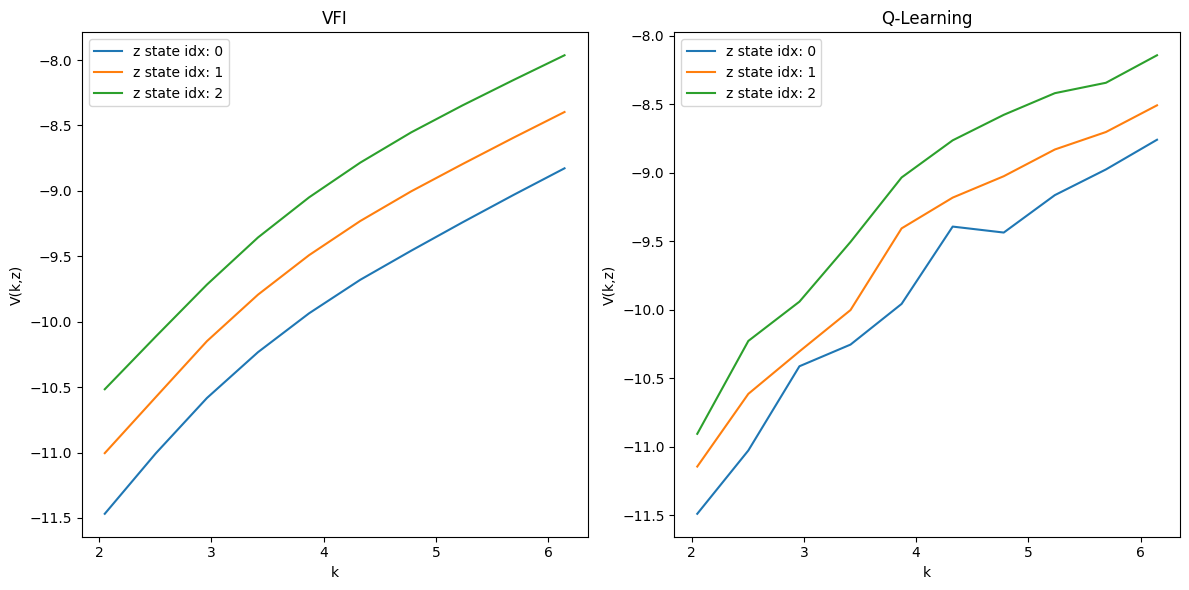

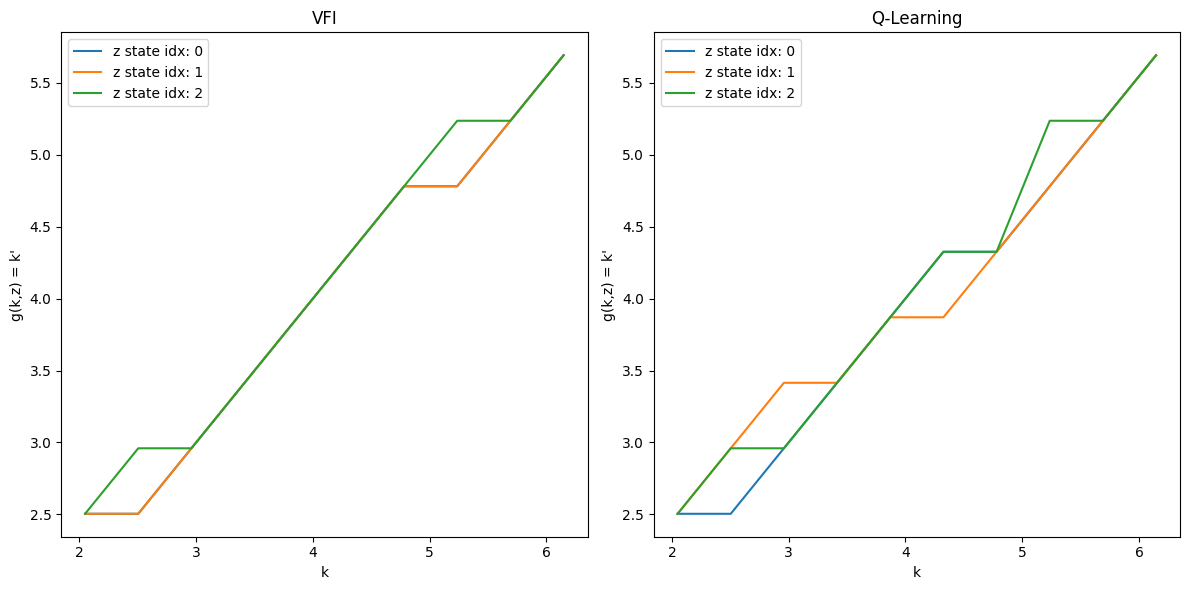

In [15]:
sp2.plot_results()
sp2.plot_results(valfunc=False)

The value functions seem similar, but not as similar as in the previous example. Why? The goal of the agent it to learn the optimal policy. In our case we have a problem with a fixed point. This means states that are far away from the optimal solution, are less frequently visited and thus the value function is less precise. 

This is especially clear when we look at the equivalent policy function. To really see if the Q-Learning agent has learned the policy, you should put the agent in a random state and let the policy converge to a single action. Akin to plot *ADD PLOT NAME* in the previous example. 

The convergence plot of the TD-error, shows a specific part of this implementation: Some of the consumption values are infeasible and are replaced by -inf (Practically, this has to be implemented by using very large negative values to avoid numpy errors). 

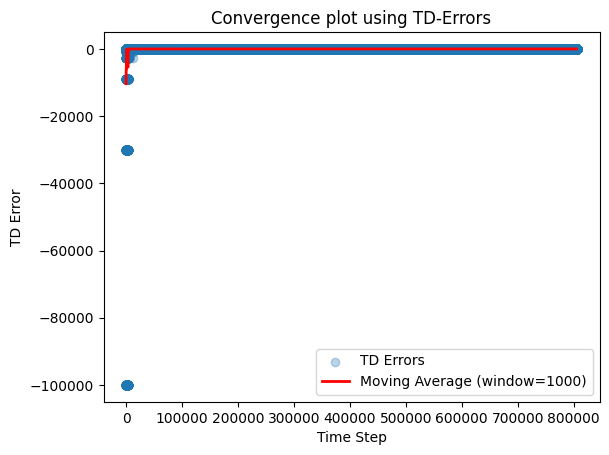

In [17]:
sp2.plot_td_error()